In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import copy

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
comb = ["Park", "Miao"]

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
# ignores FutureWarnings. Helps in readbility.
# Since we are using a conda envrionment with defined package versions we are not concerned with changes in a package's future releases.


In [4]:
datadir = "data"
savedir = "plots"

if not os.path.exists(savedir):
    os.mkdir(savedir)

In [13]:
jsds_glob_dict = {}
jsds_glob_means_dict = {}
jsds_glob_stds_dict = {}

cat0, cat1 = comb[0], comb[1]
methods = ["MuSiC", "CibersortX", "Scaden", "TAPE-O", "TAPE-A", "BayesPrism", "BayesPrism-M", "DISSECT"]

results = [os.path.join(datadir, "{}_{}.csv").format(method.replace(" ", "_"), cat0.lower()) for method in methods]
results_dict = dict(zip(methods, results))

results = [os.path.join(datadir, "{}_{}.csv").format(method.replace(" ", "_"), cat1.lower()) for method in methods]
results_dict1 = dict(zip(methods, results))

df_results_dict = {}
for method in results_dict.keys():
    df = pd.read_csv(results_dict[method], index_col=0)
    # df[df<0] = 0
    df_results_dict[method] = df
    
df_results_dict1 = {}
for method in results_dict1.keys():
    df = pd.read_csv(results_dict1[method], index_col=0)
    # df[df<0] = 0
    df_results_dict1[method] = df
    
common = list(set(df_results_dict["MuSiC"].columns)&set(df_results_dict1["MuSiC"].columns))

from scipy.spatial.distance import jensenshannon as jsd
jsds_dict = {}
jsds_means_dict = {}
jsds_stds_dict = {}
for method in methods:
    x = df_results_dict[method][common]
    x = x.div(x.sum(1),0)
    y = df_results_dict1[method][common]
    y = y.div(x.sum(1),0)
    jsds_ls = []
    for i in range(x.shape[0]):
        jsds_ls.append(jsd(x.iloc[i,:], y.iloc[i,:]))
    jsds_dict[method] = jsds_ls
    jsds_means_dict[method] = np.mean(jsds_ls)
    jsds_stds_dict[method] = np.std(jsds_ls)
    
jsds_glob_dict["_".join(comb)] = copy.deepcopy(jsds_dict)
jsds_glob_means_dict["_".join(comb)] = copy.deepcopy(jsds_means_dict)
jsds_glob_stds_dict["_".join(comb)] = copy.deepcopy(jsds_stds_dict)

In [14]:
colors_dict = {'MuSiC': '#0173b2',
                 'CibersortX': '#de8f05',
                 'Scaden': '#029e73',
                 'TAPE-O': '#d55e00',
                 'TAPE-A': '#cc78bc',
                 'Linear MLPs': '#ca9161',
                 'BayesPrism': '#ece133',
                 'BayesPrism-M': '#949494',
                 'DISSECT': '#fbafe4'} # same colors as in main

In [15]:
sns.set(style="whitegrid", font_scale=1.3)

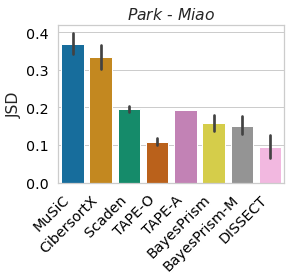

In [16]:
i=1

plt.figure(figsize=(14,4))
indices = list(range(len(jsds_glob_dict["_".join(comb)]["MuSiC"])))

df = pd.DataFrame(index=indices, columns=methods)

for method in methods:
    df[method] = jsds_glob_dict["_".join(comb)][method]
ax = plt.subplot(1,4,i)
# Generates 3 duplicate plots to keep the size similar to individual plots for kidney by
# ensuring same number of axes.
pd.DataFrame.iteritems = pd.DataFrame.items
sns.barplot(data=df, palette=colors_dict, ax=ax)
# sns.stripplot(data=df, palette=colors_dict, ax=ax, edgecolor="gray",
#              linewidth=1)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
    
plt.xticks(rotation=45, ha="right")
plt.ylabel("JSD")

range_ = np.arange(0, df.max().max()+0.05, 0.1)
plt.yticks(range_)
plt.title(r"${}$".format(comb[0].capitalize()) + " - " + r"${}$".format(comb[1].capitalize()))
plt.tight_layout()

plt.savefig(os.path.join(savedir, "3D_jsd_kidney.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "3D_jsd_kidney.png"), bbox_inches="tight", dpi=300)

# 3E

In [17]:
df_metadata = pd.read_table(os.path.join(datadir, "metadata_kidney.txt"), index_col=0)
df_metadata = df_metadata.dropna()

In [18]:
import matplotlib.ticker as ticker

In [19]:
results_cats = comb

In [20]:
methods = ["MuSiC", "CibersortX", "Scaden", "TAPE-O", "TAPE-A", "Linear MLPs", "BayesPrism", "BayesPrism-M", "DISSECT"]

df_dict = {}
for cat in results_cats:
    df_dict[cat] = {}
    results = [os.path.join(datadir, "{}_{}.csv".format(method.replace(" ", "_"), cat.lower())) for method in methods]
    results_dict = dict(zip(methods, results))
    
    for method in methods:
        df = pd.read_csv(results_dict[method], index_col=0)
        df_dict[cat][method] = df

In [21]:
sns.set(style="whitegrid", font_scale=1)

In [22]:
palette = {"Ctrl": "lightblue", "APOL1": "blue"}

In [23]:
methods = list(df_dict["Miao"].keys())
datasets = list(df_dict.keys())
tick_spacing = .5


In [24]:
cts = ["PT", "DCT", "Macro"]

In [25]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

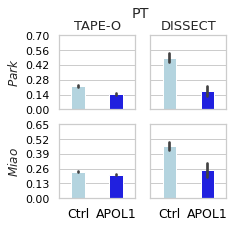

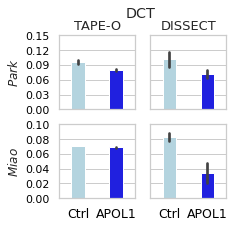

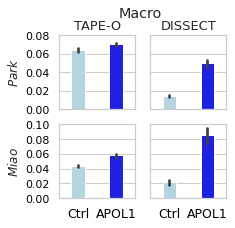

In [26]:
j=1
for ct in cts:
    plt.figure(figsize=(3,3))
    plt.suptitle(ct, ha="center", va="center")
    i=1
    methods1 = ["TAPE-O", "DISSECT"]
    for dataset in datasets:
        max_ct = max([df_dict[dataset][methods1[0]][ct].max(), df_dict[dataset][methods1[1]][ct].max()])
        for method in methods1:
            ax=plt.subplot(2,len(methods1),i)

            y = df_dict[dataset][method].loc[df_metadata.index.tolist(), ct]

            x = df_metadata["Condition"]
            tmp = pd.DataFrame(columns=[ct, "Condition"], index=x.index)
            tmp[ct] = y.tolist()
            tmp["Condition"] = x.tolist()

            tmp["Condition"].replace({"Kidney_G2-APOL1_risk allele": "APOL1",
                             "WT": "Ctrl"}, inplace=True)
            tmp["x"] = tmp["Condition"].tolist()
            tmp["x"].replace({"Ctrl": 0, "APOL1": 1}, inplace=True)


            sns.barplot(data=tmp, x="Condition", y=ct, palette=palette, order=["Ctrl", "APOL1"],
                       ax=ax)
            ax.tick_params(axis='x', colors='black')
            ax.tick_params(axis='y', colors='black')
            
            change_width(ax, .35)
            if i not in [1,3]:
                plt.ylabel("") 
                ax.set_yticklabels([])
            else:
                plt.ylabel(r"${}$".format(dataset))
            
            range_ = np.arange(0, max_ct+round(max_ct/4,2), round(max_ct/4,2))
            plt.yticks(range_)
            
           
            ax.set_xticklabels(["Ctrl", "APOL1"], fontsize=12.5, )
            if i<3:
                plt.xticks([])
                plt.title(method, fontsize=13)
            plt.xlabel("")
            i+=1

    plt.savefig(os.path.join(savedir, f"3E{j}_kidney_conditions.pdf"), bbox_inches="tight")
    plt.savefig(os.path.join(savedir, f"3E{j}_kidney_conditions.png"), bbox_inches="tight", dpi=300)
    plt.show()
    j+=1